[*********************100%%**********************]  1 of 1 completed


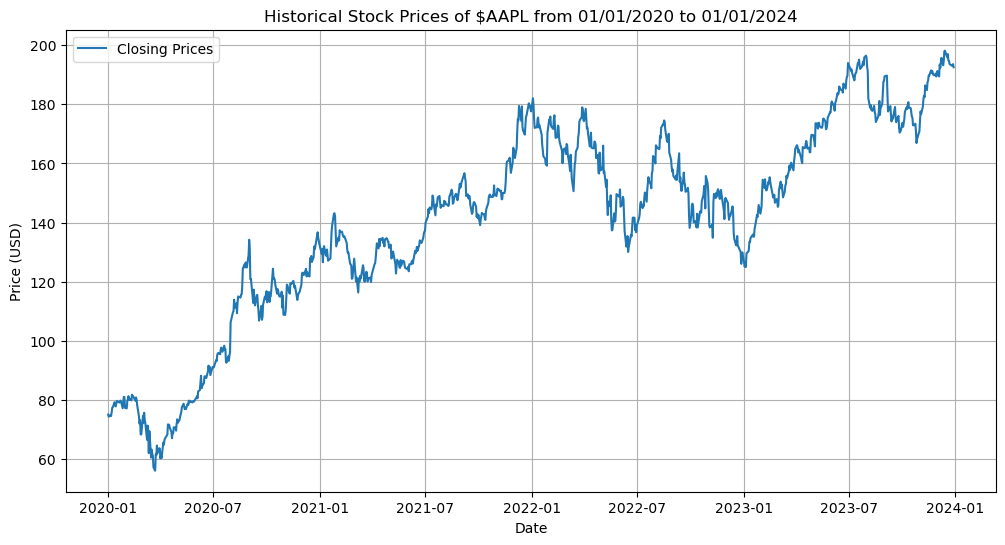


Mean Absolute Error (MAE): 1.96
Mean Squared Error (MSE): 6.97
Root Mean Squared Error (RMSE): 2.64
R-squared (R2) Score: 0.99


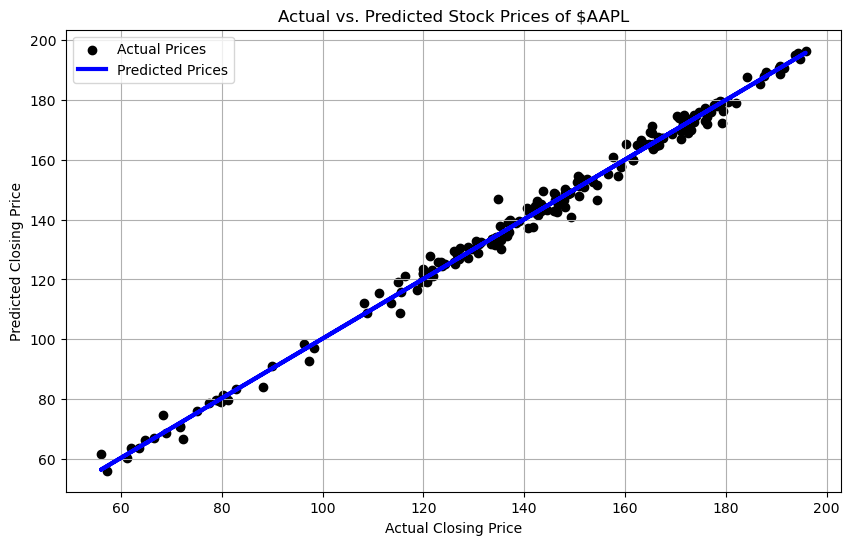

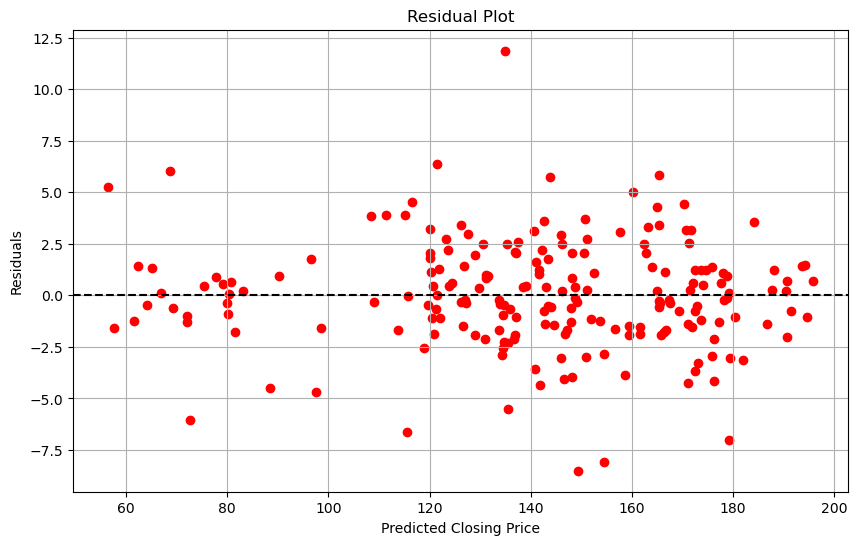

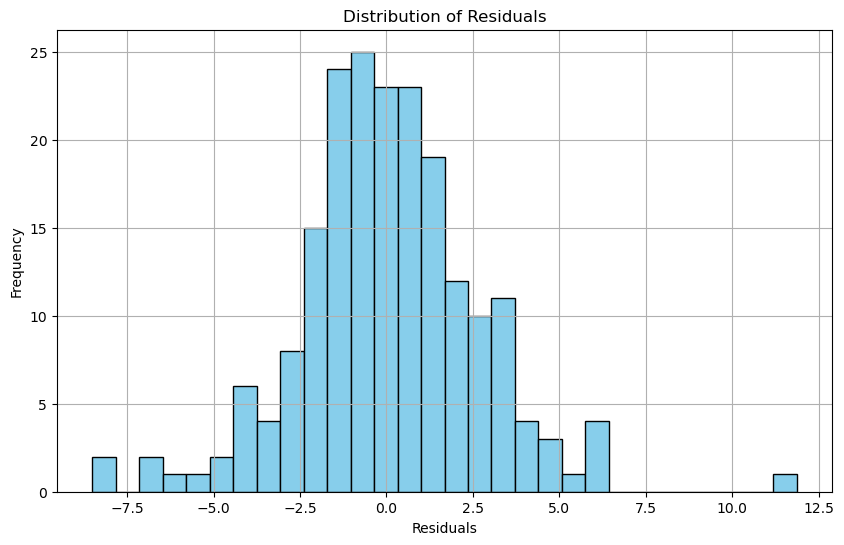

In [11]:
import yfinance as yf #yahoo finance package


import numpy as np # numpy for data processsing and math
from sklearn.model_selection import train_test_split # splitting into train/test data using TrainTestSPlit
from sklearn.linear_model import LinearRegression # Using standard lin reg model to fit to stock price
import matplotlib.pyplot as plt # visualization for the graphs that are printed out
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #import loss formulas, google for the actual formulas.
from datetime import datetime



stock_symbol = 'AAPL'  # constant to declare a stock ticker to run the model with. Here I Picked apple
start_date = '2020-01-01' #YYYY-MM-DD afaik
end_date = '2024-01-01' #YYYY-MM-DD afaik
stock_data = yf.download(stock_symbol, start=start_date, end=end_date) 
# call of yahoo finance api with following args:
# symbol (as declared earlier), start date in YYYY-MM-DD format, end date in YYYY-MM-DD format. Converts data to DF for processing
start_date_forgraph  = datetime.strptime(start_date, '%Y-%m-%d').strftime('%m/%d/%Y')
end_date_forgraph = datetime.strptime(end_date, '%Y-%m-%d').strftime('%m/%d/%Y')
# Plotting the historical stock prices of chosen plot
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Prices')
plt.title(f'Historical Stock Prices of ${stock_symbol} from {start_date_forgraph} to {end_date_forgraph}') # title of plot
plt.xlabel('Date') #x axis label 
plt.ylabel('Price (USD)') # y axis label
plt.legend() # adds a legend
plt.grid(True) # adds lines
plt.show() # code to actually print the graph

# Creating target variable (shifted by one day) and removing NaN values
y = stock_data['Close'].shift(-1).dropna().values
# y is the column from our stock data ("yesterday", or day -1") of the column
X = stock_data['Close'][:-1].values 
#x is all of the close prices of the stock 
# Reshape X to a 2D array (required for sklearn)
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#google train test split. basically hides info from the model so it doesnt over/undefit

# Create and train linear regression model
model = LinearRegression() #calling earlier import
model.fit(X_train, y_train) # model works

# Predicting test set results
predictions = model.predict(X_test) # using the 20% obfuscated data to see if the model can accurately predict



# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'\nMean Absolute Error (MAE): {mae:.2f}') # shortens to 2 decimal pts
print(f'Mean Squared Error (MSE): {mse:.2f}') # shortens to 2 decimal pts
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Visualizing the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Prices')
plt.plot(X_test, predictions, color='blue', linewidth=3, label='Predicted Prices')
plt.title(f'Actual vs. Predicted Stock Prices of ${stock_symbol}')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting residuals (difference between actual and predicted prices)
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(True)
plt.show()


# Visualizing the residuals distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#testing git on local machine